In [1]:
import pandas as pd
import local_config
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv')


In [2]:
# set up the dataset for new data

df["Sigma_Ratio"] = np.abs(df["Sigma_2"] / df["Sigma_1"])  # normalize sigmas

df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

# Save it back
df.to_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv', index=False)

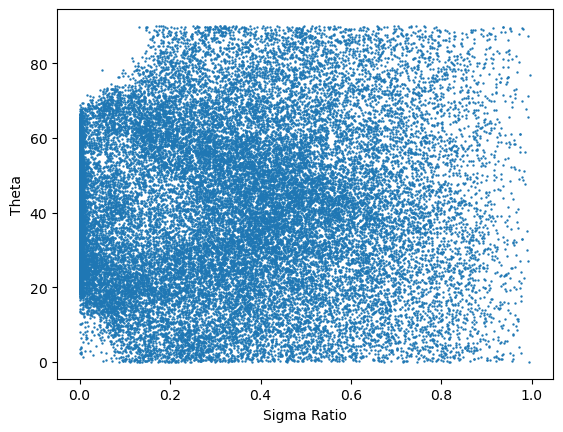

In [3]:
# thetas vs sigma ratio scatter

plt.scatter(df["Sigma_Ratio"], df["Theta"], s=0.5)
plt.xlabel("Sigma Ratio")
plt.ylabel("Theta")
plt.show()

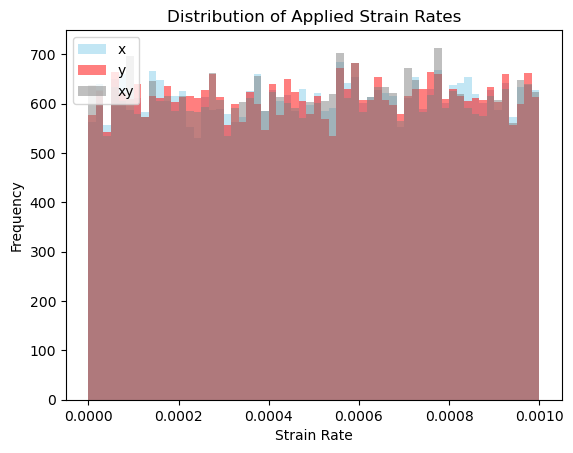

In [4]:
# strain rate histogram

plt.hist(df["Strain Rate x"], bins=60, color='skyblue', alpha=0.5, label='x')
plt.hist(df["Strain Rate y"], bins=60, color='red', alpha=0.5, label='y')
plt.hist(df["Strain Rate xy"], bins=60, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()

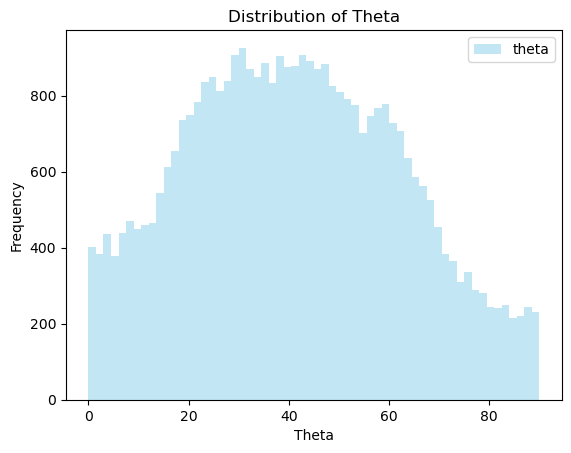

In [5]:
# Thetas histogram

plt.hist(df["Theta"], bins=60, color='skyblue', alpha=0.5, label='theta')

plt.xlabel("Theta")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Theta")
plt.show()

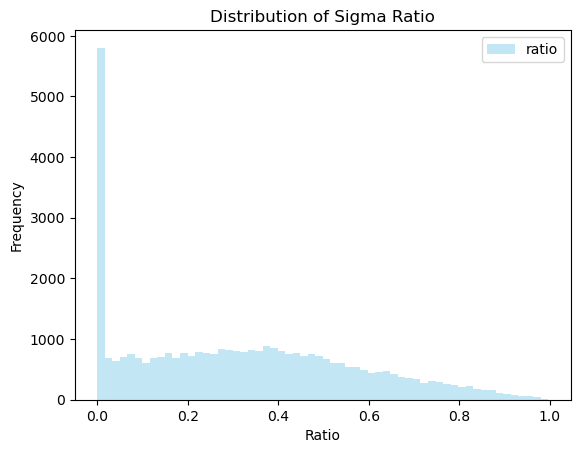

In [6]:
# ratios histogram

plt.hist(df["Sigma_Ratio"], bins=60, color='skyblue', alpha=0.5, label='ratio')

plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Sigma Ratio")
plt.show()

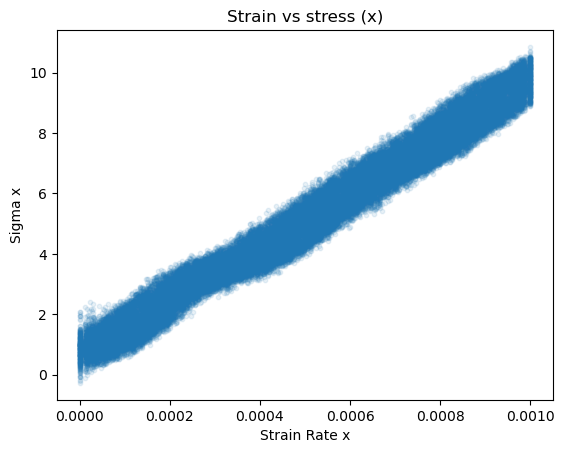

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)
print(df)

c = 0
for i in range(len(df)):
    if df[0][i] == 0.001 or df[1][i] == 0.001 or df[2][i] == 0.001:
        # print(df.iloc[i])
        c += 1

print(c)


plt.hist(df[0], bins=200, color='skyblue', alpha=0.5, label='x')
plt.hist(df[1], bins=200, color='red', alpha=0.5, label='y')
plt.hist(df[2], bins=200, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()

/tmp/ipykernel_1374339/142409332.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)


EmptyDataError: No columns to parse from file

/tmp/ipykernel_1184654/2325833280.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


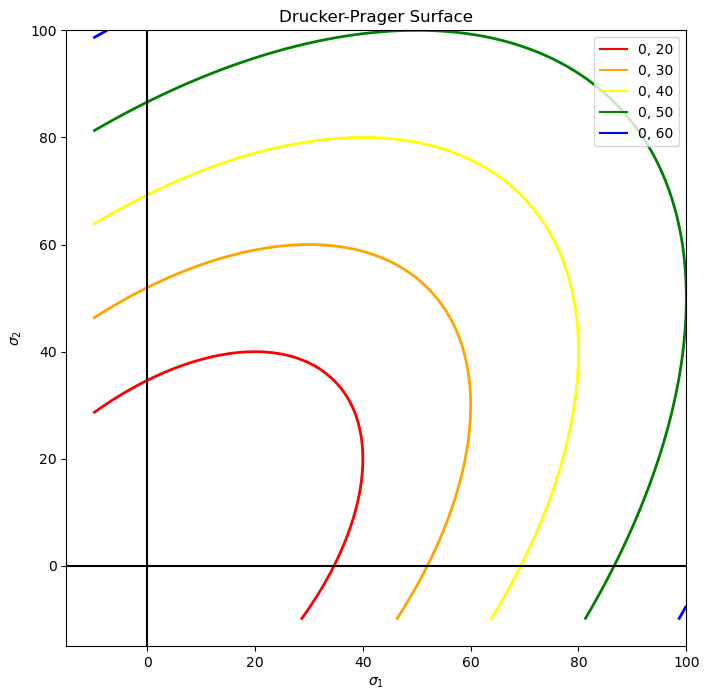

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Set plot range around your data


grid = np.linspace(-10, 100, 1000)

# Create sigma1, sigma2 grid
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  

# Compute I1 and sqrt(J2)
i1 = sig1 + sig2 + sig3
mean_stress = i1 / 3
dev_xx = sig1 - mean_stress
dev_yy = sig2 - mean_stress
dev_zz = sig3 - mean_stress

j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

def plot_dp(a, k, col, ax):
    F = np.sqrt(j2) + a * i1 - k
    ax.contour(sig1, sig2, F, levels=[0], colors=col, linewidths=2)
    ax.plot([], [], color=col, label=f"{a}, {k}")  # for legend 

fig, ax = plt.subplots(figsize=(8, 8))

# plot_dp(-0.2, 30, "red", ax)
# plot_dp(-0.1, 30, "orange", ax)
# plot_dp(0.0, 30, "yellow", ax)
# plot_dp(0.1, 30, "green", ax)
# plot_dp(0.2, 30, "blue", ax)

plot_dp(0, 20, "red", ax)
plot_dp(0, 30, "orange", ax)
plot_dp(0, 40, "yellow", ax)
plot_dp(0, 50, "green", ax)
plot_dp(0, 60, "blue", ax)


ax.plot([-50, 130], [0, 0], color='black')
ax.plot([0, 0], [-50, 130], color='black')

ax.set_xlabel(r"$\sigma_1$")
ax.set_ylabel(r"$\sigma_2$")

ax.set_xlim(-15, 100)
ax.set_ylim(-15, 100)

ax.set_title(f"Drucker-Prager Surface")
ax.legend()

fig.show()


# DP Parameters in $\alpha, k$ space

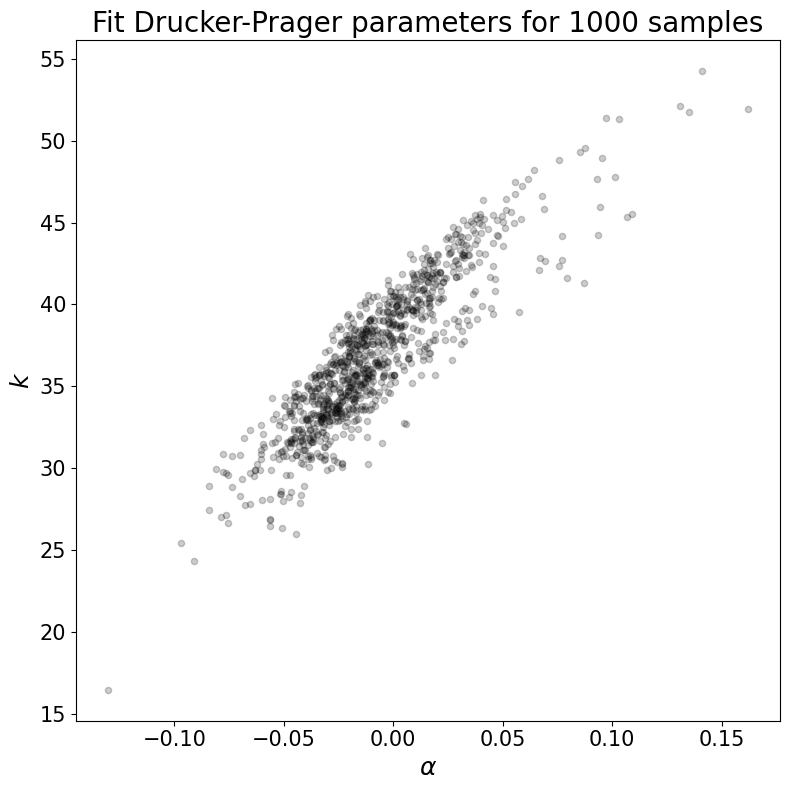

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


# DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

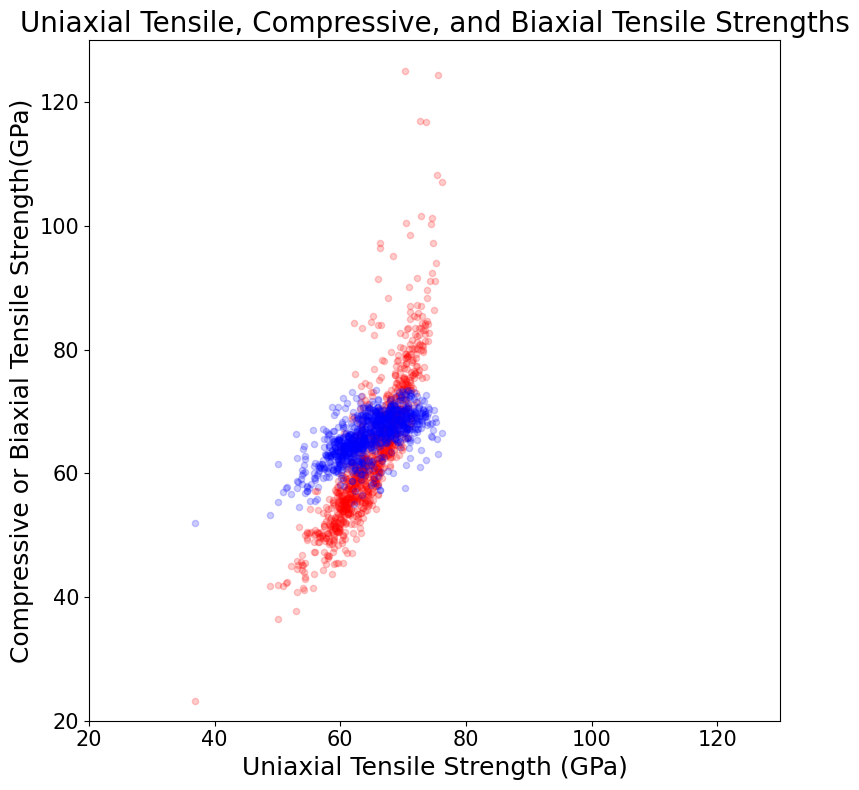

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

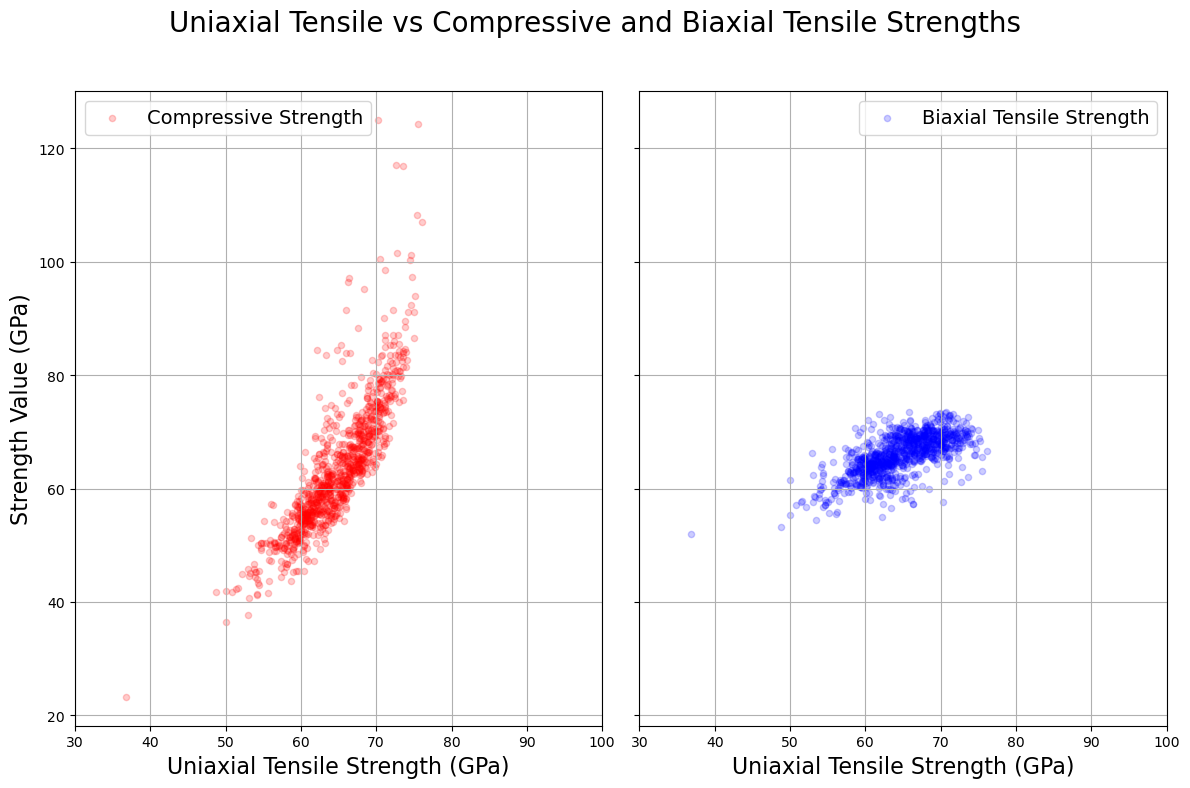

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
fig.subplots_adjust(wspace=0)

# Left plot: cs vs ts
ax1.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive Strength')
ax1.set_xlim(30, 100)
ax1.set_xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=16)
ax1.set_ylabel(r"Strength Value (GPa)", fontsize=16)
ax1.legend(fontsize=14)
ax1.grid(True)

# Right plot: bs vs ts
ax2.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile Strength')
ax2.set_xlim(30, 100)
ax2.set_xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=16)
ax2.legend(fontsize=14)
ax2.grid(True)

# Optional: remove right y-axis ticks
ax2.tick_params(labelleft=False)

plt.suptitle("Uniaxial Tensile vs Compressive and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# DP Parameters in $\sigma_{ts}, \sigma_{bs}$ space

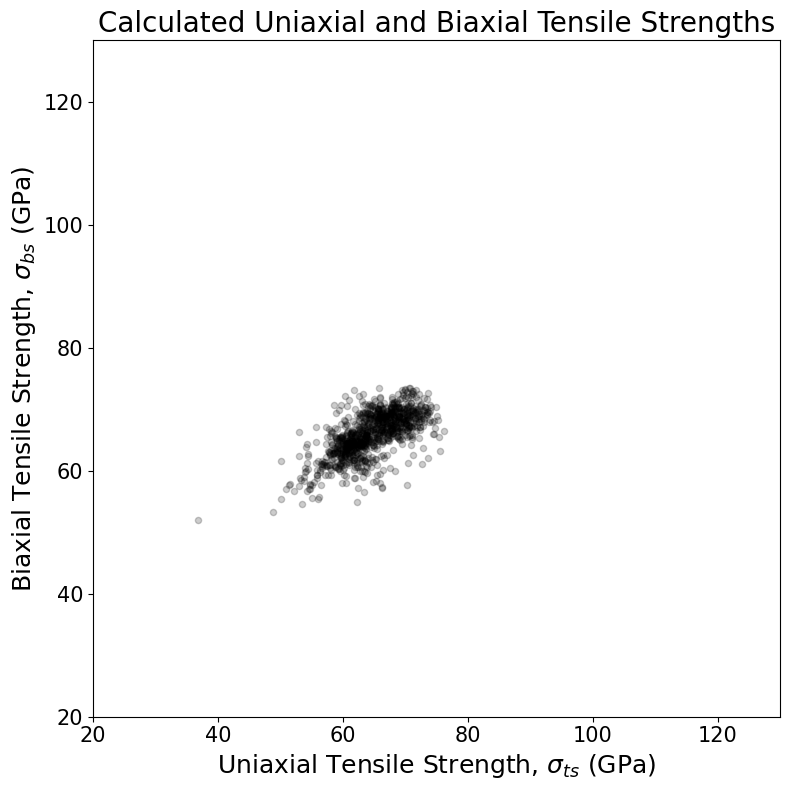

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])


plt.scatter(ts, bs, color='black', s=20, alpha=0.2)
plt.xlabel(r"Uniaxial Tensile Strength, $\sigma_{ts}$ (GPa)", fontsize=18)
plt.ylabel(r"Biaxial Tensile Strength, $\sigma_{bs}$ (GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Calculated Uniaxial and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

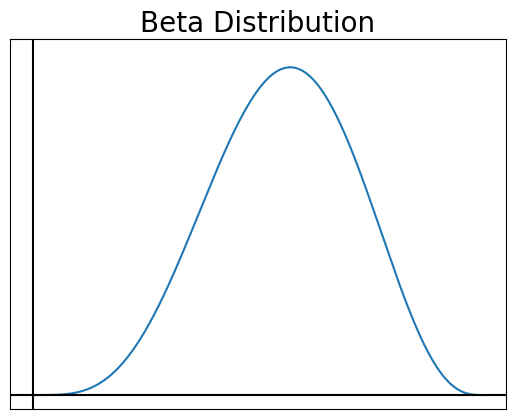

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
a, b = 5, 4  # you can change these to any positive values

# Create x values from 0 to 1
x = np.linspace(0, 1, 500)
y = beta.pdf(x, a, b)

# Plot
plt.plot(x, y, label=f'Beta({a}, {b})')
plt.plot([-1, 2], [0, 0], color='black')
plt.plot([0, 0], [-1, 3], color='black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.1, 2.55])

plt.xticks([])
plt.yticks([])

plt.title('Beta Distribution', fontsize=20)

plt.show()

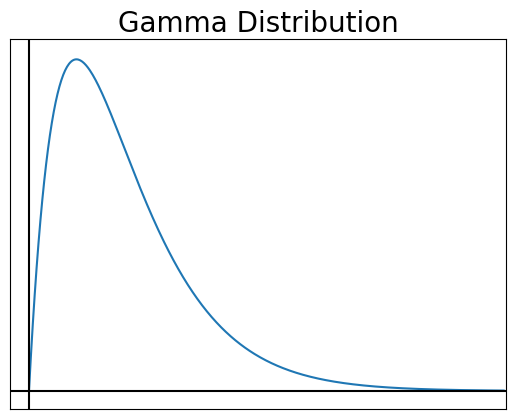

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters for the beta distribution
a, b = 2, 0  # you can change these to any positive values

# Create x values from 0 to 1
x = np.linspace(0, 10, 500)
y = gamma.pdf(x, a, b)

# Plot
plt.plot(x, y)
plt.plot([-1, 11], [0, 0], color='black')
plt.plot([0, 0], [-1, 11], color='black')

plt.xlim([-0.4, 10.05])
plt.ylim([-0.02, 0.39])

plt.xticks([])
plt.yticks([])

plt.title('Gamma Distribution', fontsize=20)

plt.show()

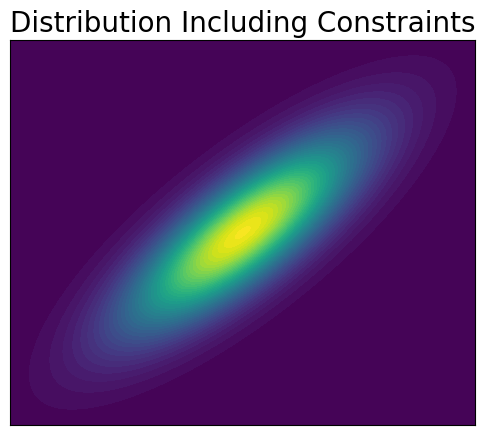

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the grid
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Mean and covariance
mean = [0, 0]
cov = [[1.0, 0.8], [0.8, 1.0]]  # Positive correlation

# Compute the multivariate normal density
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Plot
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.title('Distribution Including Constraints', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()


In [30]:
import numpy as np

ratio = 0
theta_deg = 0
sigma1 = 10
theta_rad = np.deg2rad(theta_deg)
sigma2 = ratio * sigma1

# Principal stress matrix
sigma_p = np.array([[sigma1, 0],
                    [0, sigma2]])

# Rotation matrix
c = np.cos(theta_rad)
s = np.sin(theta_rad)
Q = np.array([[c, s],
                [-s, c]])

# Rotate principal stresses back to x-y
sigma = Q @ sigma_p @ Q.T

sigma_x = np.round(sigma[0, 0], 4)
sigma_y = np.round(sigma[1, 1], 4)
sigma_xy = np.round(sigma[0, 1], 4)

print([sigma_x, sigma_y, abs(sigma_xy)])

[10.0, 0.0, 0.0]


In [1]:
89.36725590925197,34.532591315229766,49.307921303605376
import numpy as np

# get principal stresses and principal directions
vals, vecs = np.linalg.eigh(np.array([[89.36725590925197, 49.307921303605376],
                                        [49.307921303605376, 34.532591315229766]]))
# eigh returns from lowest eigval to highest eigval, so the last one is sigma_1
ratio = vals[-2] / vals[-1]

eigvecs = vecs[:, ::-1]  # reverse the order so the first one is dominant
theta_deg = np.degrees(np.arctan2(eigvecs[:, 0][1], eigvecs[:, 0][0])) % 180
theta = min(theta_deg, 180 - theta_deg)  # normalize it to [0, 90]

print(ratio, theta)

0.04673573437866959 30.46202589355235


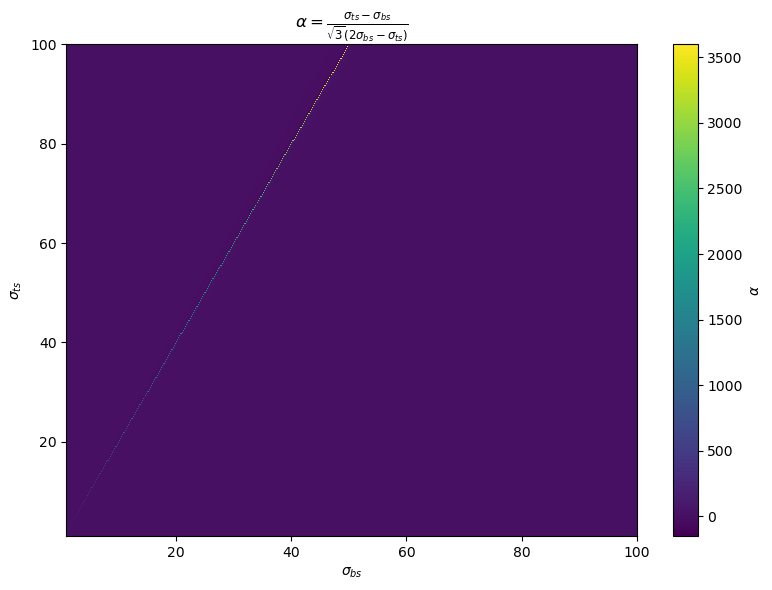

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(1, 100, 500)
sigma_ts = np.linspace(1, 100, 500)

# Create meshgrid
BS, TS = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
# alpha = (CS - TS) / (np.sqrt(3) * (CS + TS))
alpha = (TS - BS) / (np.sqrt(3) * (2 * BS - TS))


# Plot
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(BS, TS, alpha, shading='auto', cmap='viridis')
plt.colorbar(c, label=r'$\alpha$')

plt.xlabel(r'$\sigma_{bs}$')
plt.ylabel(r'$\sigma_{ts}$')
# plt.title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')
plt.title(r'$\alpha = \frac{\sigma_{ts} - \sigma_{bs}}{\sqrt{3} (2\sigma_{bs} - \sigma_{ts})}$')

plt.tight_layout()
plt.show()


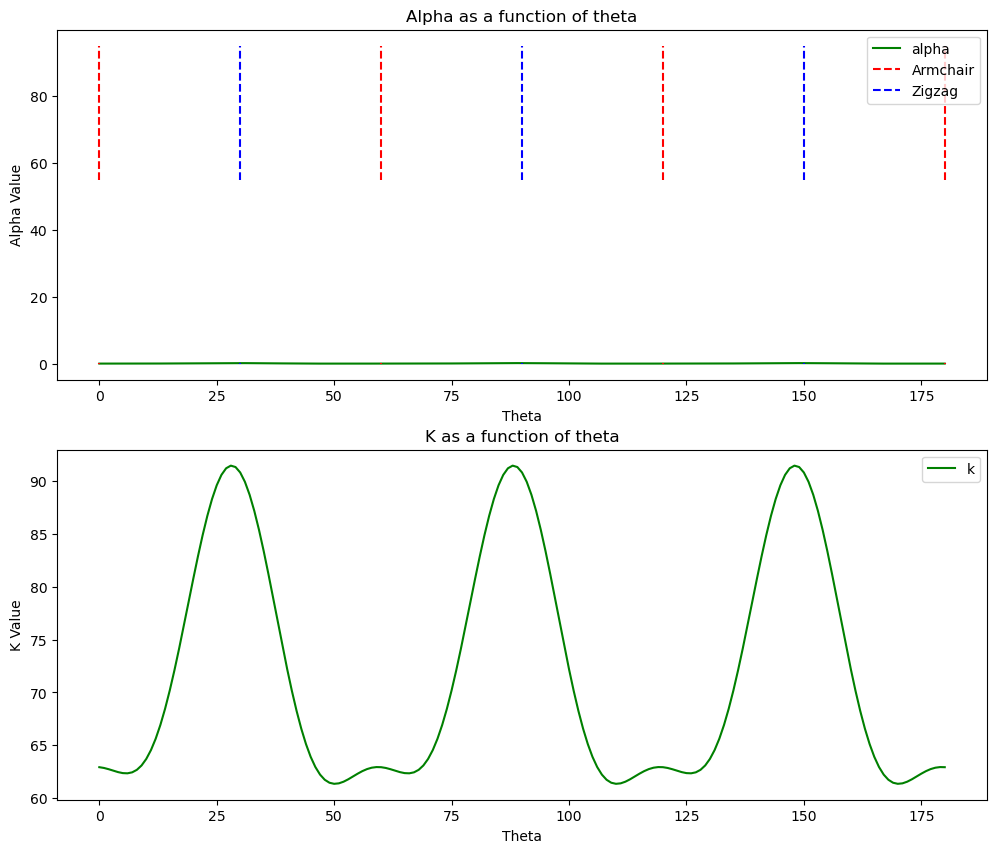

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("drucker_prager_params_thetas3D.csv")
def omega(theta):
    return 2 * np.pi * theta / 60

def alpha(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["a0"]
        + df["a1"] * np.cos(om)
        + df["a2"] * np.sin(om)
        + df["a3"] * np.cos(2 * om)
        + df["a4"] * np.sin(2 * om)
    )
    return val

def k(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["k0"]
        + df["k1"] * np.cos(om)
        + df["k2"] * np.sin(om)
        + df["k3"] * np.cos(2 * om)
        + df["k4"] * np.sin(2 * om)
    )
    return val

thetas = np.arange(0, 181, 1)
alphas = []
ks = []
for i in range(len(thetas)):
    alphas.append(alpha(i))
    ks.append(k(i))

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(thetas, alphas, color='green', label='alpha')
axs[0].plot([0, 0], [0, 0.22], '--', color='red', label='Armchair')
axs[0].plot([60, 60], [0, 0.22], '--', color='red')
axs[0].plot([120, 120], [0, 0.22], '--', color='red')
axs[0].plot([180, 180], [0, 0.22], '--', color='red')
axs[0].plot([30, 30], [0, 0.22], '--', color='blue', label='Zigzag')
axs[0].plot([90, 90], [0, 0.22], '--', color='blue')
axs[0].plot([150, 150], [0, 0.22], '--', color='blue')
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Alpha Value")
axs[0].set_title("Alpha as a function of theta")
axs[0].legend()

axs[1].plot(thetas, ks, color='green', label='k')
axs[1].plot([0, 0], [55, 95], '--', color='red', label='Armchair')
axs[1].plot([60, 60], [55, 95], '--', color='red')
axs[1].plot([120, 120], [55, 95], '--', color='red')
axs[1].plot([180, 180], [55, 95], '--', color='red')
axs[1].plot([30, 30], [55, 95], '--', color='blue', label='Zigzag')
axs[1].plot([90, 90], [55, 95], '--', color='blue')
axs[1].plot([150, 150], [55, 95], '--', color='blue')
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("K Value")
axs[1].set_title("K as a function of theta")
axs[1].legend()

plt.show()

In [2]:
"""
This fits the 2-parameter Drucker-Prager model to a set of strength surface data and stores the alpha, k, and seed in the csv
"""

import pandas as pd
from plot_StrengthSurface import filter_data
import local_config
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


def main():
    folder = f'{local_config.DATA_DIR}/rotation_tests'
    csv_file = f"{folder}/all_simulations.csv"

    exact_filters = {
        "Num Atoms x": 60,
        "Num Atoms y": 60
        # "Defect Type": "SV",
        # "Defect Percentage": 0.5,
        # "Theta": 0,
        # "Defect Random Seed": 54
    }

    range_filters = {
        # "Defect Percentage": (0.4, 0.6),
        # "Defect Random Seed": (1, 1000)
        # "Theta": (0, 90),
    }

    or_filters = {
        # "Defect Type": ["SV", "DV"],
        # "Theta": [0, 30, 60, 90]
    }

    DP_3D = True

    df = pd.read_csv(csv_file)
    df = duplicate_biaxial_rows(df)
    filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, dupe_thetas=False)
    interest_value = 'Defect Percentage'

    # Group by defect seed
    grouped = filtered_df.groupby(interest_value)

    surfaces = []
    alphas = []
    ks = []

    individual_plots = True

    if ((len(grouped) >= 10) and (individual_plots == True)):
        inp = input(f"Warning! Set to save {len(grouped)} plots. Was this intentional? Type 'n' to quit. ")
        if inp == 'n':
            exit()

    rows = []
    rmse = []
    loss = []

    for instance, group_df in grouped:
        # Create a list of DataPoints for this seed
        datapoints = [DataPoint(row) for _, row in group_df.iterrows()]

        # Create Surface and fit Drucker-Prager
        surface = Surface(datapoints, interest_value, fit_full3D=DP_3D)  # changed from just surface
        surface.fit_drucker_prager()

        print(f"Fit surface for {interest_value} {int(instance)}.")

        stats = surface.compute_loss_statistics(print_outputs=True)
        if stats["rmse"] is not np.nan:
            rmse.append(stats["rmse"])
            loss.append(stats["total_loss"])

        surfaces.append(surface)
        alphas.append(surface.alpha)
        ks.append(surface.k)

        if DP_3D:
            rows.append({f"{interest_value}": surface.instance, "a0": surface.alpha[0], "a1": surface.alpha[1], 
                         "a2": surface.alpha[2], "a3": surface.alpha[3], "a4": surface.alpha[4], "k0": surface.k[0],
                         "k1": surface.k[1],  "k2": surface.k[2],  "k3": surface.k[3], "k4": surface.k[4]})
            if individual_plots:
                surface.plot_3d_fit()
        else:
            rows.append({f"{interest_value}": surface.instance, "alpha": surface.alpha, "k": surface.k})
            if individual_plots:
                surface.plot_surface_fit()

    if len(rmse) > 0:
        print(f"Final average RMSE over {len(rmse)} samples: {np.sum(rmse) / len(rmse)}")
        print(f"Final average total loss over {len(loss)} samples: {np.sum(loss) / len(loss)}")

    df_params = pd.DataFrame(rows)
    if DP_3D:
        df_params.to_csv("drucker_prager_params_thetas3D.csv", index=False)
    else:
        df_params.to_csv("drucker_prager_params_new.csv", index=False)


def duplicate_biaxial_rows(df):
    # Identify perfectly biaxial tension cases (ratio == 1.0 and maybe sigma_xy ≈ 0)
    is_biaxial = (df["Theta Requested"] == -1)

    # # Get all unique theta values present in the dataset (for binning)
    # all_thetas = df["Theta Requested"].unique()
    # all_thetas = np.sort(all_thetas)

    # Extract the biaxial rows
    biaxial_rows = df[is_biaxial]

    # For each theta, duplicate the biaxial row and assign that theta
    new_rows = []
    for theta in range(0, 91, 10):
        if theta != -1:
            for _, row in biaxial_rows.iterrows():
                new_row = row.copy()
                new_row["Theta"] = theta
                new_rows.append(new_row)

    df = df[df["Theta Requested"] != -1]  # remove the -1 so we don't plot it
    # Append duplicated rows to dataframe
    return pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


class MadeSurface():
    def __init__(self, alpha, k, interest_value=None, instance=None):
        self.alpha = alpha
        self.k = k
        self.interest_value = interest_value
        self.instance = instance


class DataPoint:
    def __init__(self, df):
        """
        This class defines a single point in the strength surface
        
        df (pandas dataframe): dataframe for one single datapoint in the big dataframe (one row long)
        """
        self.df = df

    def calculate_invariants(self):
        # we only store the principal stresses, so the stress tensor is diagonal by default
        sigma = np.diagflat([self.df["Strength_1"], self.df["Strength_2"], self.df["Strength_3"]])
        i1 = np.trace(sigma)  # tr(sigma)
        dev_stress = sigma - (1 / 3) * i1 * np.identity(3)
        dev2 = dev_stress @ dev_stress
        j2 = 0.5 * np.trace(dev2)
        return i1, j2
    

class Surface():
    def __init__(self, points, interest_value, fit_full3D=False):
        """
        This class defines a single strength surface and can fit a Drucker-Prager model to it
        
        points (list[DataPoint]): list of datapoints for the surface
        """

        self.points = points
        self.interest_value = interest_value
        self.instance = self.check_instance()
        self.alpha = None
        self.k = None
        self.fit_result = None
        self.fit_full3D = fit_full3D

    def check_instance(self):
        """
        Check to make sure all of our random seeds match up, returns the seed if it does match
        -- expanded this to cover all "interest values", such as thetas, etc
        """
        df_list = []

        val = self.points[0].df[self.interest_value]
        for p in self.points:
            if p.df[self.interest_value] != val:
                raise ValueError(f"{self.interest_value}'s do not match up in this surface!")
            df_list.append(p.df.to_frame().T)

        # Combine into a single DataFrame
        self.full_df = pd.concat(df_list, ignore_index=False)
        return val

    def dp(self, point, params):
        if self.fit_full3D:
            theta = point.df["Theta"]
            omega = 2 * np.pi * theta / 60

            # First + second harmonics for alpha and k
            alpha = (
                params[0]
                + params[1] * np.cos(omega)
                + params[2] * np.sin(omega)
                + params[3] * np.cos(2 * omega)
                + params[4] * np.sin(2 * omega)
            )
            k = (
                params[5]
                + params[6] * np.cos(omega)
                + params[7] * np.sin(omega)
                + params[8] * np.cos(2 * omega)
                + params[9] * np.sin(2 * omega)
            )
        else:
            alpha = params[0]
            k = params[1]

        i1, j2 = point.calculate_invariants()
        residual = np.sqrt(j2) + alpha * i1 - k
        return residual

    def loss(self, params, return_resid=False):
        """
        Loss function to minimize: sum of squared Drucker-Prager residuals.

        params: [alpha, k]
        """
        residuals = []
        for point in self.points:
            residual = self.dp(point, params)
            residuals.append(residual)

        if return_resid:
            return residuals
        else:
            return sum(np.array(residuals)**2)

    def fit_drucker_prager(self):
        """
        Fit Drucker-Prager parameters (alpha, k) to the current surface by minimizing the least squares loss.
        Stores the optimized values in self.alpha and self.k.
        """
        try:
            if self.fit_full3D:
                # result = minimize(self.loss, x0=[0, 0, 0, 1, 0, 0], method="BFGS")
                result = minimize(self.loss, x0=[0, 0, 0, 1, 0, 0, 0, 1, 0, 0], method="BFGS")
            else:
                result = minimize(self.loss, x0=[0.0, 1.0])
            self.fit_result = result 
            if result.success or "precision loss" in result.message:
                if self.fit_full3D:
                    # a0, a1, a2, b0, b1, b2 = result.x
                    # self.alpha = [a0, a1, a2]
                    # self.k = [b0, b1, b2]
                    a0, a1, a2, a3, a4, b0, b1, b2, b3, b4 = result.x
                    self.alpha = [a0, a1, a2, a3, a4]
                    self.k = [b0, b1, b2, b3, b4]
                else:
                    self.alpha, self.k = result.x
            else:
                raise RuntimeError(f"Minimization failed: {result.message}")

        except RuntimeError as e:
            print(f"Warning: Seed {int(self.seed)} fit failed. {e}")
            self.alpha, self.k = np.nan, np.nan

    def compute_loss_statistics(self, print_outputs=False):
        if self.alpha is np.nan or self.k is np.nan:
            return {
                "total_loss": np.nan,
                "mse": np.nan,
                "rmse": np.nan,
                "max_residual": np.nan
            }
        if self.fit_full3D:
            residuals = self.loss(self.alpha + self.k, return_resid=True)  # combine two lists
        else:
            residuals=self.loss([self.alpha, self.k], return_resid=True)

        residuals = np.array(residuals)
        n = len(residuals)
        total_loss = np.sum(residuals**2)
        mse = total_loss / n
        rmse = np.sqrt(mse)
        max_residual = np.max(np.abs(residuals))

        if print_outputs:
            if self.fit_full3D:
                print(f"{self.interest_value} {self.instance}:")
                print(f"alpha = [{self.alpha[0]:.4f}, {self.alpha[1]:.4f}, {self.alpha[2]:.4f}, {self.alpha[3]:.4f}, {self.alpha[3]:.4f}]")
                print(f"k = [{self.k[0]:.4f}, {self.k[1]:.4f}, {self.k[2]:.4f}, {self.k[3]:.4f}, {self.k[4]:.4f}]")
                print(f"RMSE: {rmse:.4f}, Max Residual: {max_residual:.4f}, Total Loss: {total_loss:.4f}.")
            else:
                print(f"{self.interest_value} {int(self.instance)}: alpha = {self.alpha:.4f}, k = {self.k:.4f}... RMSE: {rmse:.4f}, Max Residual: {max_residual:.4f}, Total Loss: {total_loss:.4f}.")

        return {
            "total_loss": total_loss,
            "mse": mse,
            "rmse": rmse,
            "max_residual": max_residual
        }
    
    def plot_surface_fit(self, resolution=1000):
        # Set plot range around your data
        sig1_vals = [dp.df["Strength_1"] for dp in self.points]
        sig2_vals = [dp.df["Strength_2"] for dp in self.points]
        theta_vals = [dp.df["Theta"] for dp in self.points]
        thetareq_vals = [dp.df["Theta Requested"] for dp in self.points]
        # dist = np.abs(np.array(theta_vals) - np.array(thetareq_vals))
        dist = [
            0 if dp.df["Strain Rate x"] == dp.df["Strain Rate y"]
            else abs(dp.df["Theta"] - dp.df["Theta Requested"])
            for dp in self.points
        ]

        min_sig, max_sig = min(sig1_vals + sig2_vals), max(sig1_vals + sig2_vals)
        grid = np.linspace(min_sig * 1.1, max_sig * 1.1, resolution)

        # Create sigma1, sigma2 grid
        sig1, sig2 = np.meshgrid(grid, grid)
        sig3 = np.zeros_like(sig1)  

        # Compute I1 and sqrt(J2)
        i1 = sig1 + sig2 + sig3
        mean_stress = i1 / 3
        dev_xx = sig1 - mean_stress
        dev_yy = sig2 - mean_stress
        dev_zz = sig3 - mean_stress

        j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

        # Evaluate DP function
        F = np.sqrt(j2) + self.alpha * i1 - self.k

        plt.figure(figsize=(8, 8))

        # Plot contour where f = 0 (the strength boundary)
        plt.contour(sig1, sig2, F, levels=[0], colors="red", linewidths=2)
        plt.plot([], [], color="red", label="DP surface")  # for legend (cs.collections is not working)

        # Plot data points
        # plt.scatter(sig1_vals, sig2_vals, color="blue", label="MD failure points")
        # plt.scatter(sig2_vals, sig1_vals, color="blue")
        # Plot both sets, but assign the first one to a handle
        sc = plt.scatter(sig1_vals, sig2_vals, c=dist, label="MD failure points", cmap='cool', vmin=0, vmax=13)
        plt.scatter(sig2_vals, sig1_vals, c=dist, cmap='cool', vmin=0, vmax=13)

        # Attach colorbar to the first scatter
        plt.colorbar(sc, label="Theta Error")
        
        plt.plot([-50, 130], [0, 0], color='black')
        plt.plot([0, 0], [-50, 130], color='black')

        plt.xlabel(r"$\sigma_1$ (GPa)", fontsize=18)
        plt.ylabel(r"$\sigma_2$ (GPa)", fontsize=18)

        # plt.xlim(-15, 100)
        # plt.ylim(-15, 100)
        plt.xlim(-15, 130)
        plt.ylim(-15, 130)

        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)

        plt.title(f"Fit Drucker-Prager Surface, theta={self.instance}", fontsize=20)
        plt.legend(fontsize=15)
        plt.tight_layout()

        plt.savefig(f'{local_config.DATA_DIR}/rotation_tests/plots/DP_fitted_{int(self.instance)}.png')
        plt.close()

    # def plot_3d_fit(self, resolution=300):
    #     sig1_vals = [dp.df["Strength_1"] for dp in self.points] + [dp.df["Strength_2"] for dp in self.points]
    #     theta_vals = [dp.df["Theta"] for dp in self.points] + [dp.df["Theta"] for dp in self.points]

    #     min_sig, max_sig  = min(sig1_vals), max(sig1_vals)
    #     sig_grid = np.linspace(min_sig, max_sig, resolution)
    #     theta_vals = np.linspace(0, 90, resolution)

    #     # Create 3D meshgrid (σ1, σ2, θ)
    #     sig1, sig2, theta = np.meshgrid(sig_grid, sig_grid, theta_vals, indexing='ij')
    #     sig3 = np.zeros_like(sig1)

    #     # Invariants
    #     i1 = sig1 + sig2 + sig3
    #     mean_stress = i1 / 3
    #     dev_xx = sig1 - mean_stress
    #     dev_yy = sig2 - mean_stress
    #     dev_zz = sig3 - mean_stress
    #     j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

    #     # alpha_theta = self.alpha[0] + self.alpha[1]*np.cos(6*theta_rad) + self.alpha[2]*np.sin(6*theta_rad)
    #     # k_theta = self.k[0] + self.k[1]*np.cos(6*theta_rad) + self.k[2]*np.sin(6*theta_rad)
    #     omega = 2 * np.pi * theta / 60
    #     alpha_theta = (
    #         self.alpha[0]
    #         + self.alpha[1] * np.cos(omega)
    #         + self.alpha[2] * np.sin(omega)
    #         + self.alpha[3] * np.cos(2 * omega)
    #         + self.alpha[4] * np.sin(2 * omega)
    #     )
    #     k_theta = (
    #         self.k[0]
    #         + self.k[1] * np.cos(omega)
    #         + self.k[2] * np.sin(omega)
    #         + self.k[3] * np.cos(2 * omega)
    #         + self.k[4] * np.sin(2 * omega)
    #     )

    #     # Evaluate Drucker-Prager F = √J₂ + α(θ)·I₁ - k(θ)
    #     F = np.sqrt(j2) + alpha_theta * i1 - k_theta

    #     # Threshold for where to plot the surface (surface band)
    #     f_tol = 0.5  # change if surface too thick or thin

    #     # Mask for F ≈ 0
    #     mask = np.abs(F) < f_tol

    #     # Extract matching surface points
    #     surface_x = sig1[mask].flatten()
    #     surface_y = sig2[mask].flatten()
    #     surface_theta = theta[mask].flatten()

    #     color_vals = np.maximum(surface_x, surface_y)

    #     fig = go.Figure()

    #     fig.add_trace(
    #         go.Scatter3d(
    #             x=self.full_df["Strength_1"],
    #             y=self.full_df["Strength_2"],
    #             z=self.full_df["Theta"],
    #             mode="markers",
    #             marker=dict(color="black", size=3),
    #             name="Data Points"
    #         )
    #     )

    #     # Add the Drucker–Prager surface (where F ≈ 0)
    #     fig.add_trace(
    #         go.Scatter3d(
    #             x=surface_x,
    #             y=surface_y,
    #             z=surface_theta,
    #             mode="markers",
    #             marker=dict(
    #                 size=2,
    #                 # color="red",
    #                 color=color_vals,
    #                 colorscale="ice",
    #                 opacity=0.2,
    #                 colorbar=dict(title="max(σ₁, σ₂)", x=-0.2)
    #             ),
    #             name="DP Surface"
    #         )
    #     )

    #     fig.update_layout(
    #         title=f"Strength Surface at Different Angles", 
    #         coloraxis_colorbar=dict(x=-5),
    #         scene=dict(xaxis_title="σ₁", yaxis_title="σ₂", zaxis_title="Angle (deg)", 
    #                    xaxis_title_font=dict(size=35), yaxis_title_font=dict(size=35), zaxis_title_font=dict(size=35), 
    #                    xaxis=dict(tickfont=dict(size=18)), yaxis=dict(tickfont=dict(size=18)), zaxis=dict(tickfont=dict(size=18))),

    #         scene_camera=dict(eye=dict(x=2, y=0.5, z=1.5))
    #     )
    #     # Save plot
    #     folder = f"{local_config.DATA_DIR}/rotation_tests"
    #     html_path = f"{folder}/plots/3D_SS_FULL.html"
    #     fig.write_html(html_path, include_plotlyjs="cdn")
    #     print(f"Interactive 3D plot saved to {html_path}")

    def plot_3d_fit(self, resolution=300):
        sig1_vals = [dp.df["Strength_1"] for dp in self.points] + [dp.df["Strength_2"] for dp in self.points]
        theta_vals = [dp.df["Theta"] for dp in self.points] + [dp.df["Theta"] for dp in self.points]

        min_sig, max_sig  = min(sig1_vals), max(sig1_vals)
        sig_grid = np.linspace(min_sig, max_sig, resolution)
        theta_vals = np.linspace(0, 90, resolution)

        # Create 3D meshgrid (σ1, σ2, θ)
        sig1, sig2, theta = np.meshgrid(sig_grid, sig_grid, theta_vals, indexing='ij')
        sig3 = np.zeros_like(sig1)

        # Invariants
        i1 = sig1 + sig2 + sig3
        mean_stress = i1 / 3
        dev_xx = sig1 - mean_stress
        dev_yy = sig2 - mean_stress
        dev_zz = sig3 - mean_stress
        j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

        # alpha_theta = self.alpha[0] + self.alpha[1]*np.cos(6*theta_rad) + self.alpha[2]*np.sin(6*theta_rad)
        # k_theta = self.k[0] + self.k[1]*np.cos(6*theta_rad) + self.k[2]*np.sin(6*theta_rad)
        omega = 2 * np.pi * theta / 60
        alpha_theta = (
            self.alpha[0]
            + self.alpha[1] * np.cos(omega)
            + self.alpha[2] * np.sin(omega)
            + self.alpha[3] * np.cos(2 * omega)
            + self.alpha[4] * np.sin(2 * omega)
        )
        k_theta = (
            self.k[0]
            + self.k[1] * np.cos(omega)
            + self.k[2] * np.sin(omega)
            + self.k[3] * np.cos(2 * omega)
            + self.k[4] * np.sin(2 * omega)
        )

        # Evaluate Drucker-Prager F = √J₂ + α(θ)·I₁ - k(θ)
        F = np.sqrt(j2) + alpha_theta * i1 - k_theta

        # Threshold for where to plot the surface (surface band)
        f_tol = 0.5  # change if surface too thick or thin

        # Mask for F ≈ 0
        mask = np.abs(F) < f_tol

        # Extract matching surface points
        surface_x = sig1[mask].flatten()
        surface_y = sig2[mask].flatten()
        surface_theta = theta[mask].flatten()

        color_vals = np.maximum(surface_x, surface_y)

        valid_mask = (~np.isnan(surface_x)) & (~np.isnan(surface_y)) & (~np.isnan(surface_theta)) \
             & (~np.isinf(surface_x)) & (~np.isinf(surface_y)) & (~np.isinf(surface_theta))

        surface_x = surface_x[valid_mask]
        surface_y = surface_y[valid_mask]
        surface_theta = surface_theta[valid_mask]
        color_vals = color_vals[valid_mask]


        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot data points
        ax.scatter(
            self.full_df["Strength_1"],
            self.full_df["Strength_2"],
            self.full_df["Theta"],
            color='black',
            s=10,
            label="Data Points"
        )

        # Plot DP surface points
        sc = ax.scatter(
            surface_x,
            surface_y,
            surface_theta,
            c=color_vals,
            cmap='Reds',
            s=2,
            alpha=0.3,
            label="DP Surface"
        )
        fig.colorbar(sc, ax=ax, shrink=0.5, pad=0.1, label="max(σ₁, σ₂)")

        # Set axis labels
        ax.set_xlabel(r"$\sigma_1$", fontsize=14)
        ax.set_ylabel(r"$\sigma_2$", fontsize=14)
        ax.set_zlabel(r"Angle (deg)", fontsize=14)

        # Set orthographic projection
        ax.set_proj_type('ortho')

        # Set viewing angle — adjust as desired for cabinet look
        ax.view_init(elev=20, azim=-60)

        ax.legend()
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

Fit surface for Defect Percentage 0.
Defect Percentage 0.0:
alpha = [0.1124, -0.0712, 0.0174, 0.0253, 0.0253]
k = [71.9653, -13.9584, 3.1442, 4.9170, -1.7835]
RMSE: 2.1410, Max Residual: 4.8618, Total Loss: 1008.4993.


AttributeError: 'float' object has no attribute 'view'

<Figure size 1000x800 with 2 Axes>

Final average RMSE over 1 samples: 2.1410483200306647
Final average total loss over 1 samples: 1008.4993399153489
